# EDA on Interactions

- Data types ✅
- Missing values / Inconsistency ✅
- Features in each dataset ✅
- Size ✅
- Duplicates ✅
- Outliers ✅
- What kind of features is correlated with the number of interactions ?

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
import seaborn as sns

from eda_utils import plot_hist_feature

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
colors = plt.get_cmap('tab10').colors
plt.rc('axes', prop_cycle=cycler('color', colors))
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Dataset

According to the paper, 

| #Users | #Items | #Interactions | Density  |
|--------|--------|---------------|----------|
| 1,411  | 3,327  | 4,676,570     | 99.6%    |
| 7,176  | 10,728 | 12,530,806    | 16.3%    |

---

* User feature: Each user has 30 features which includes 12
explicit features and 18 encrypted vectors.

* Item feature: Each video has at least 1 and at most 4 tags
out of the totally 31 tags, e.g., {Sports}.
Each item has 56 explicit features, where
45 fields are the statistics of each day.

* Social network: Small matrix: 146 users have friend


In [ ]:
%%bash
if ![ -d ../data_final_project ]; then
    wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
    ' -O KuaiRec.zip
    mv data_final_project ..
    unzip KuaiRec.zip -d data_final_project
fi

--2025-05-02 06:30:12--  https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470%0A
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.178.129, 2a00:1450:4007:819::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.178.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431964858 (412M) [application/octet-stream]
Saving to: ‘KuaiRec.zip’

     0K .......... .......... .......... .......... ..........  0% 2.82M 2m26s
    50K .......... .......... .......... .......... ..........  0% 4.51M 1m59s
   100K .......... .......... .......... .......... ..........  0% 6.43M 1m40s
   150K .......... .......... .......... .......... ..........  0% 10.3M 85s
   200K .......... .......... .......... .......... ..........  0% 9.68M 77s
   250K .......... .......... .......... .......... ..........  0% 13.6M 69s
   3

## Interactions (big matrix / small matrix)

This is our training dataset.

The training set is known to be sparsed, this means there are not a lot of interactions between each video and users

In [2]:
interactions_train = pd.read_csv("../data_final_project/KuaiRec 2.0/data/big_matrix.csv")
interactions_train.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [3]:
interactions_train.shape

(12530806, 8)

In [4]:
interactions_train.describe()

,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07
mean,3.574377e+03,5.057748e+03,9.027027e+03,1.462157e+04,2.020080e+07,1.596799e+09,9.445059e-01
std,2.067008e+03,3.089868e+03,1.547343e+04,1.983474e+04,5.080192e+01,1.514698e+06,1.674601e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,2.020070e+07,1.592872e+09,0.000000e+00
25%,1.788000e+03,2.387000e+03,4.218000e+03,7.434000e+03,2.020080e+07,1.596339e+09,3.148246e-01
50%,3.578000e+03,4.822000e+03,7.277000e+03,9.636000e+03,2.020081e+07,1.596669e+09,7.234710e-01
75%,5.343750e+03,7.600000e+03,1.035000e+04,1.217900e+04,2.020083e+07,1.598502e+09,1.177644e+00
max,7.175000e+03,1.072700e+04,9.996390e+05,3.150720e+05,2.020090e+07,1.599694e+09,5.734571e+02


In [5]:
interactions_test = pd.read_csv("../data_final_project/KuaiRec 2.0/data/small_matrix.csv")
interactions_test.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


In [6]:
interactions_test.shape

(4676570, 8)

In [7]:
test_videos = set(interactions_test['video_id'].unique())
train_videos = set(interactions_train['video_id'].unique())
print(f"{len(test_videos.intersection(train_videos))} intersection")
print(f"{len(train_videos)} training videos")
print(f"{len(test_videos)} test videos")

3327 intersection
10728 training videos
3327 test videos


In [8]:
test_users = set(interactions_test['user_id'].unique())
train_users = set(interactions_train['user_id'].unique())
print(f"{len(test_users.intersection(train_users))} intersection")
print(f"{len(train_users)} training users")
print(f"{len(test_users)} test users")

1411 intersection
7176 training users
1411 test users


### General questions

#### DTypes

In [9]:
print(interactions_train.dtypes)
print(interactions_test.dtypes)
print(interactions_train["date"].head())
print(interactions_test["date"].head()) # to convert datetime
print(interactions_train["time"].head())
print(interactions_test["time"].head()) # to convert datetime

user_id             int64
video_id            int64
play_duration       int64
video_duration      int64
time               object
date                int64
timestamp         float64
watch_ratio       float64
dtype: object
user_id             int64
video_id            int64
play_duration       int64
video_duration      int64
time               object
date              float64
timestamp         float64
watch_ratio       float64
dtype: object
0    20200705
1    20200705
2    20200705
3    20200705
4    20200705
Name: date, dtype: int64
0    20200705.0
1    20200705.0
2    20200705.0
3    20200705.0
4    20200705.0
Name: date, dtype: float64
0    2020-07-05 00:08:23.438
1    2020-07-05 00:13:41.297
2    2020-07-05 00:16:06.687
3    2020-07-05 00:20:26.792
4    2020-07-05 00:43:05.128
Name: time, dtype: object
0    2020-07-05 05:27:48.378
1    2020-07-05 05:28:00.057
2    2020-07-05 05:29:09.479
3    2020-07-05 05:30:43.285
4    2020-07-05 05:35:43.459
Name: time, dtype: object


#### Missing values

In [10]:
print(interactions_train.isna().any())
print(interactions_test.isna().any())
print(interactions_test.dropna().shape[0] / interactions_test.shape[0])
interactions_test = interactions_test.dropna()

user_id           False
video_id          False
play_duration     False
video_duration    False
time              False
date              False
timestamp         False
watch_ratio       False
dtype: bool
user_id           False
video_id          False
play_duration     False
video_duration    False
time               True
date               True
timestamp          True
watch_ratio       False
dtype: bool
0.9610842989627013


In [11]:
print(f"{interactions_test.memory_usage(deep=True).sum() / (1024 ** 2)} MB")
print(f"{interactions_train.memory_usage(deep=True).sum() / (1024 ** 2)} MB")

582.4757947921753 MB
1528.325216293335 MB


In [12]:
# Duplicates
print(
    interactions_train[interactions_train.duplicated(['user_id', 'video_id'], keep=False)]
    .sort_values(by=['user_id', 'video_id'])
)
interactions_train = interactions_train[~interactions_train.duplicated(['user_id', 'video_id'], keep='first')]
print(
    interactions_test[interactions_test.duplicated(['user_id', 'video_id'], keep=False)]
    .sort_values(by=['user_id', 'video_id'])
)
interactions_test = interactions_test[~interactions_test.duplicated(['user_id', 'video_id'], keep='first')]

          user_id  video_id  play_duration  video_duration  \
9               0       169          13735            9767   
807             0       169          13287            9767   
15              0       206            818            9067   
834             0       206            721            9067   
36              0       217          14311            5367   
...           ...       ...            ...             ...   
12530635     7175     10408          57187            6188   
12530626     7175     10552           4642           31486   
12530627     7175     10552           4642           31486   
12530710     7175     10572           4159           14165   
12530711     7175     10572           4159           14165   

                             time      date     timestamp  watch_ratio  
9           2020-07-06 00:14:48.8  20200706  1.593966e+09     1.406266  
807       2020-08-03 03:30:46.769  20200803  1.596397e+09     1.360397  
15        2020-07-06 01:07:48.597  2

### Unique Users

In [13]:
unique_train_users = set(interactions_train["user_id"].unique())
unique_test_users = set(interactions_test["user_id"].unique())
print(f"{len(unique_train_users)} users in training")
print(f"{len(unique_test_users)} users in test")
print(f"{len(unique_train_users & unique_test_users)} users in both") # data is consistent and match paper properties

7176 users in training
1411 users in test
1411 users in both


### Unique Videos

In [14]:
unique_train_videos = set(interactions_train["video_id"].unique())
unique_test_videos = set(interactions_test["video_id"].unique())
print(f"{len(unique_train_videos)} videos in training")
print(f"{len(unique_test_videos)} videos in test")
print(f"{len(unique_train_videos & unique_train_videos)} videos in both") # data is consistent and match paper properties

10728 videos in training
3327 videos in test
10728 videos in both


#### Video duration correlation

We see some incohrence in dataset, we should mean video duration incoherence and apply on the whole dataset

The video duration does not have a lot of information gain as well

/tmp/ipykernel_23919/575253040.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(binned_data['duration_bin'].astype(str), rotation=45)


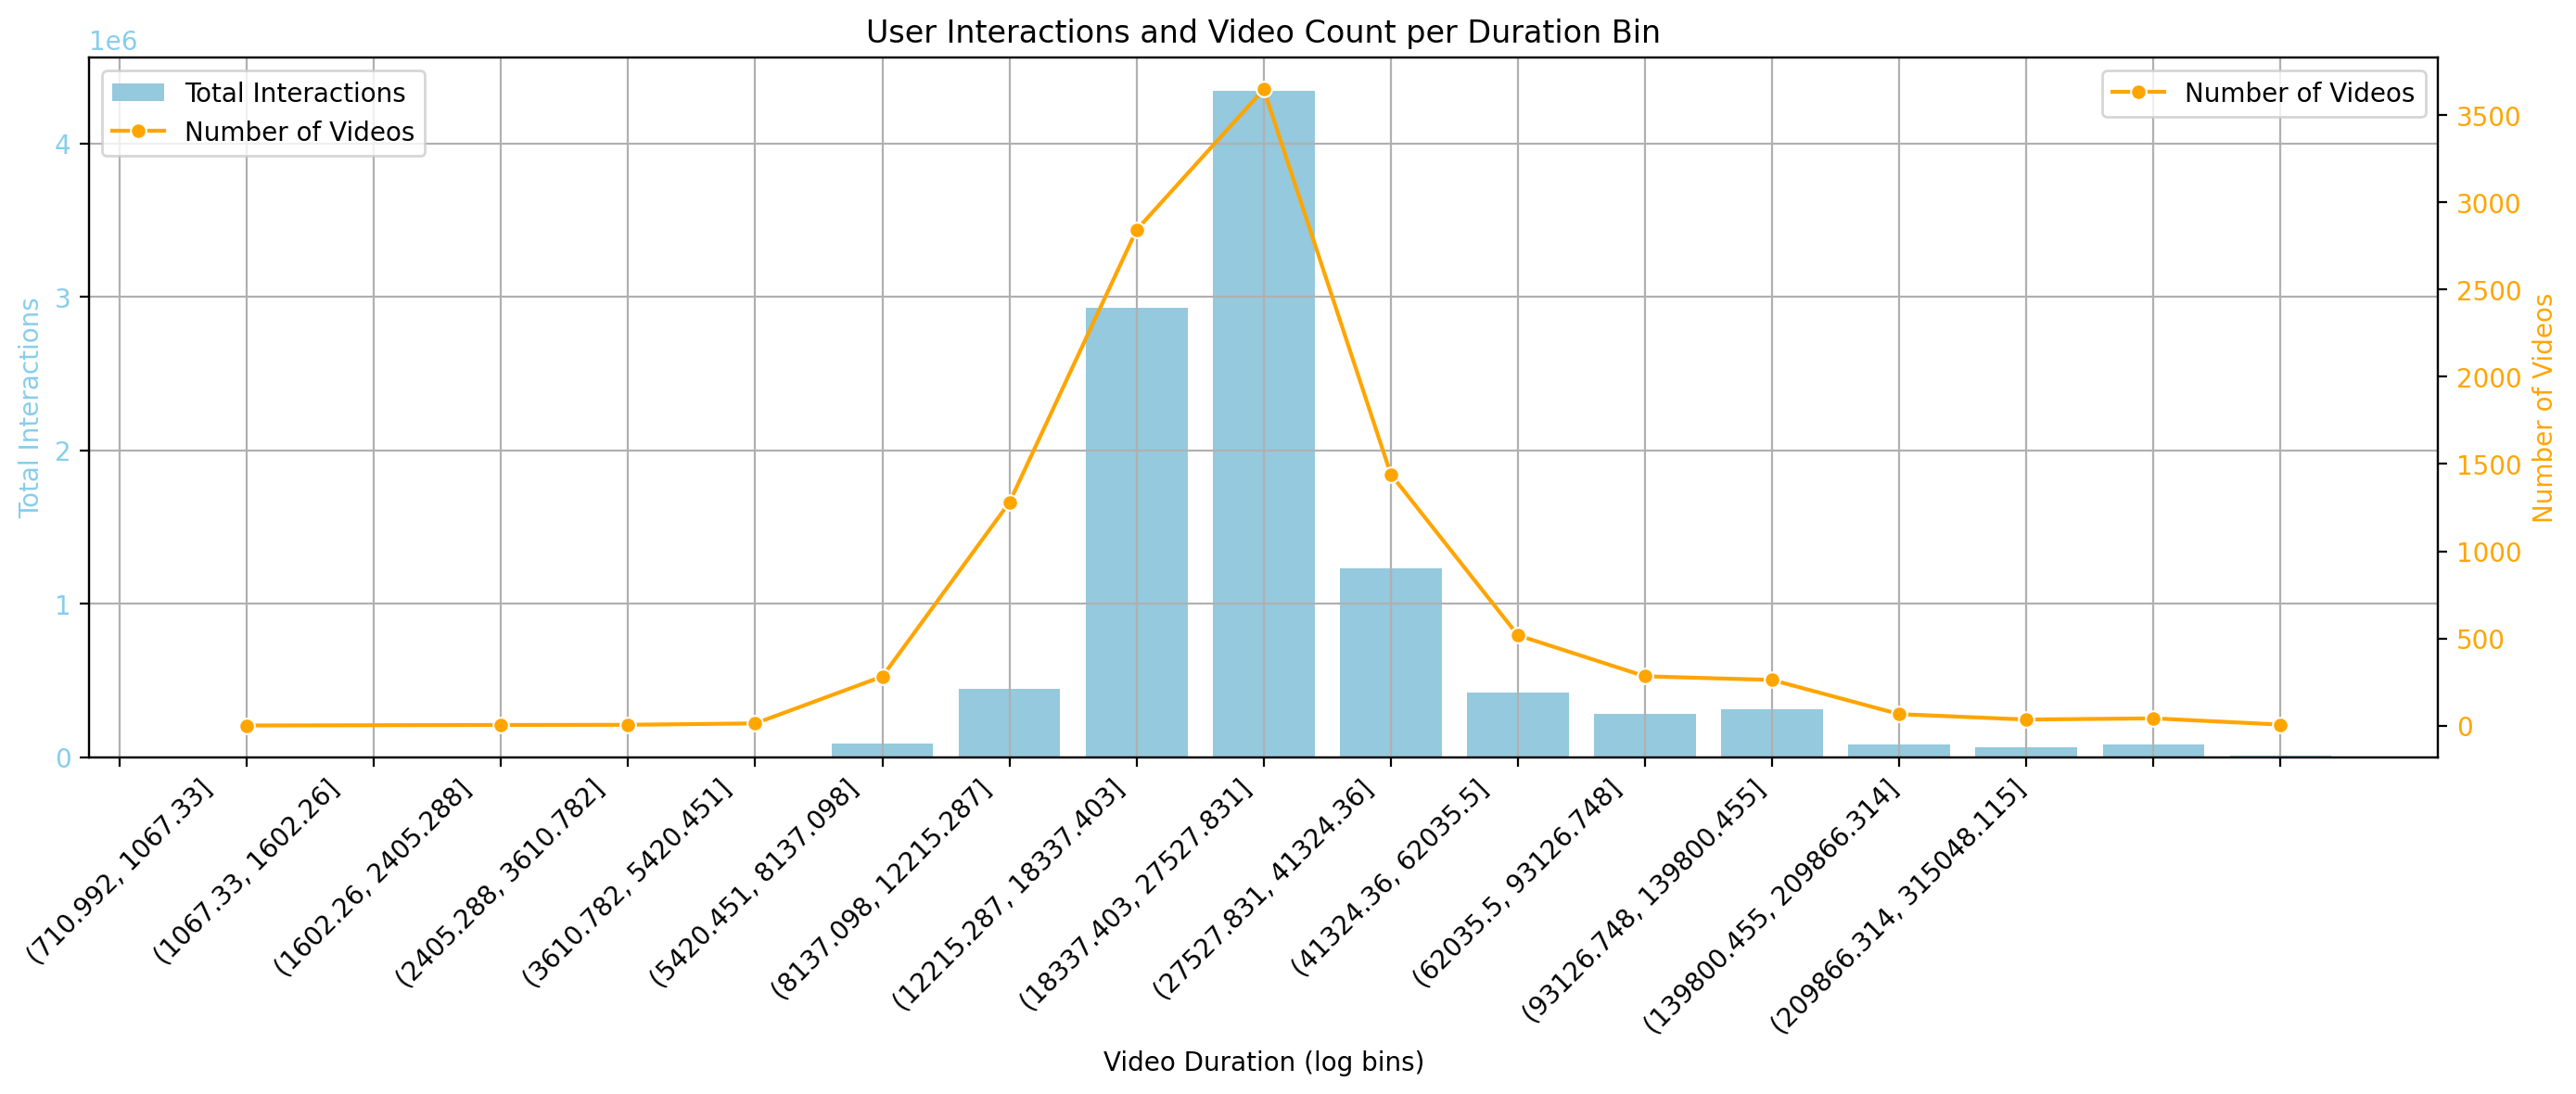

In [15]:

video_interactions = interactions_train.groupby('video_id').size().reset_index(name='interaction_count')

video_durations = interactions_train.groupby('video_id')['video_duration'].mean().reset_index()

video_data = pd.merge(video_interactions, video_durations, on='video_id')

log_bins = np.logspace(np.log10(video_data['video_duration'].min()),
                       np.log10(video_data['video_duration'].max()), num=20)
video_data['duration_bin'] = pd.cut(video_data['video_duration'], bins=log_bins)

binned_data = video_data.groupby('duration_bin', observed=True).agg(
    total_interactions=('interaction_count', 'sum'),
    video_count=('video_id', 'count')
).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.barplot(data=binned_data, x='duration_bin', y='total_interactions', ax=ax1, color='skyblue', label='Total Interactions')
ax1.set_ylabel('Total Interactions', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(binned_data['duration_bin'].astype(str), rotation=45)
ax1.set_xlabel('Video Duration (log bins)')
ax1.set_title('User Interactions and Video Count per Duration Bin')
ax1.grid(True)

ax2 = ax1.twinx()
binned_data['bin_label'] = binned_data['duration_bin'].astype(str)
sns.lineplot(data=binned_data, x='bin_label', y='video_count', ax=ax2, color='orange', marker='o', label='Number of Videos')
ax2.set_ylabel('Number of Videos', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

### Interaction per user

There is no need to verify interaction per user in test set since the density is almost 100%.

**Uniquess**
We remark that user interaction when we remove duplicate interactions (when user replay the video), we have a gaussian dstribution with outliers for user having less than 600 interactions.

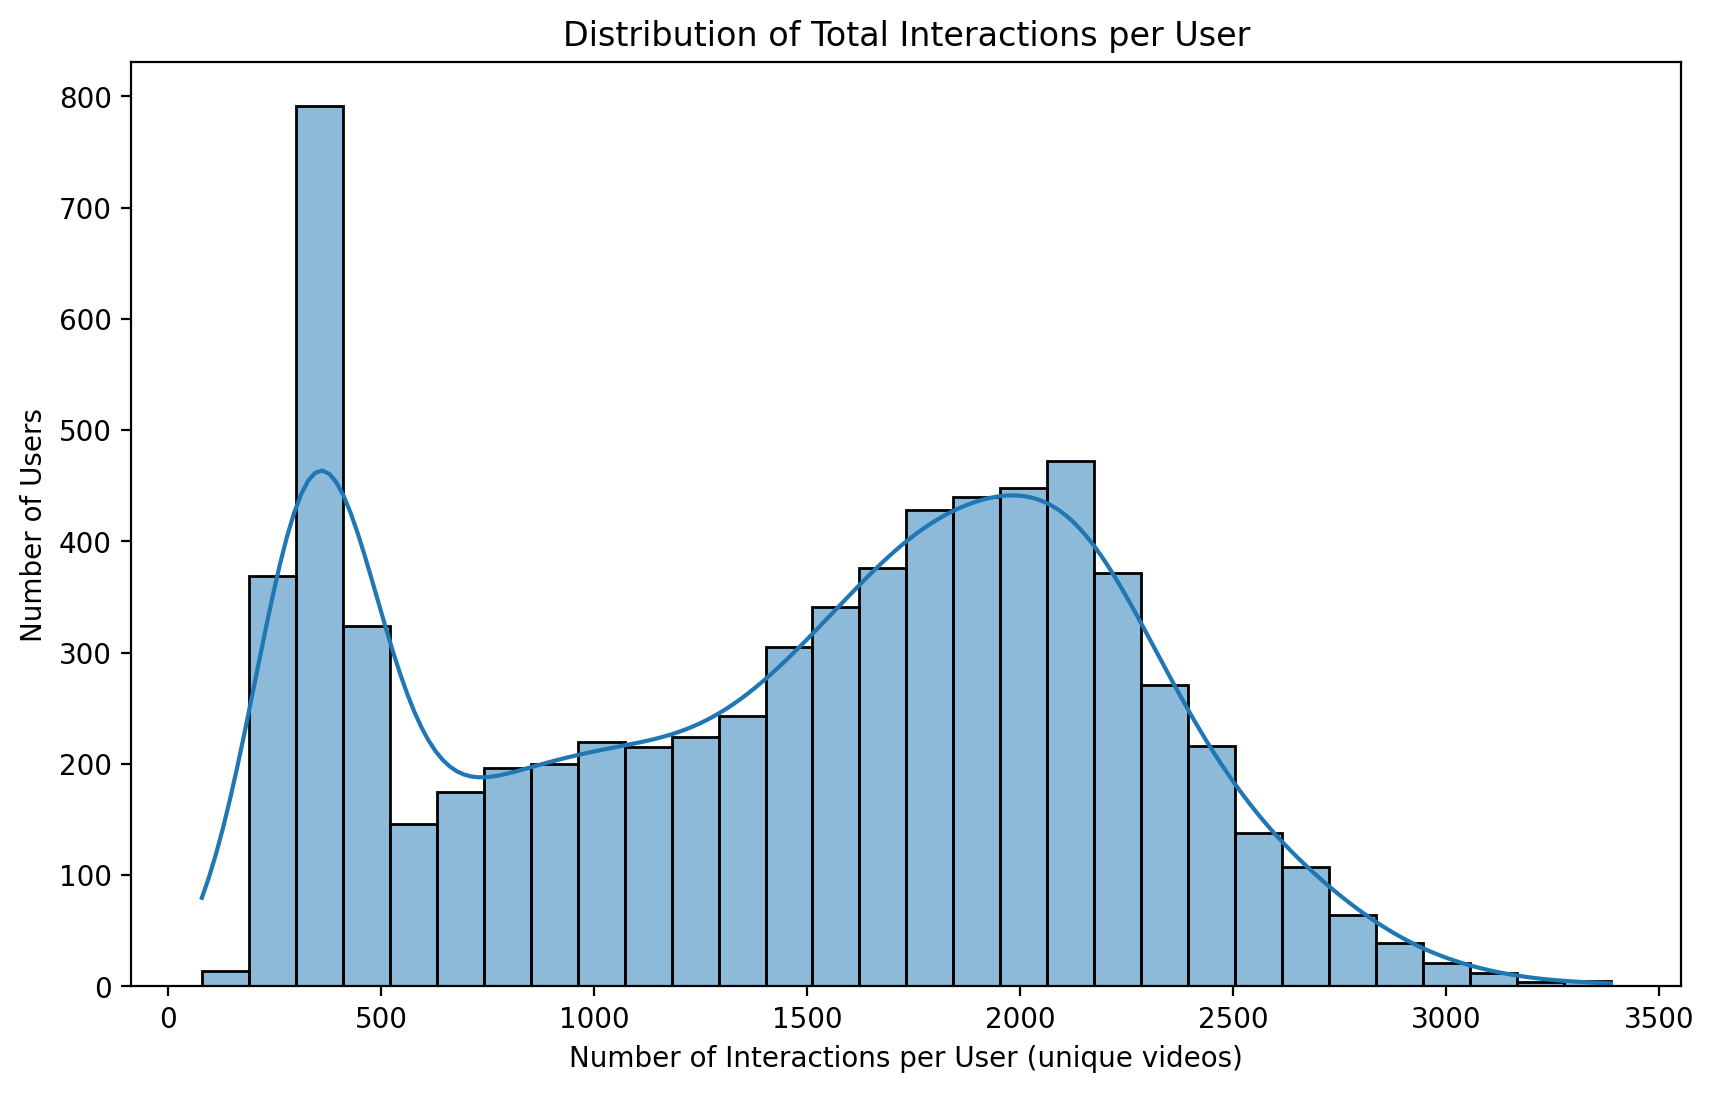

In [16]:
# Interactions per user with unique videos
nb_interactions_per_user = interactions_train.drop_duplicates(subset=['user_id', 'video_id']) \
    .groupby('user_id')['video_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_user['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per User (unique videos)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Interactions per User')

plt.show()

**Non Uniquess**
The plot shows very sparse results where some users have nearly 0 interactions whereas other have more than 3000 interactions.

* 91.9% have less than 3000 interactions
* 0.069% have more than 6000 interactions (high outliers)
* 17.7% have less than 500 interactions
* 0.11% have less then 200 interactions (low outliers)
* **91.18% are included in [200,3000] interactions**

> 6000 interactions: 0.0
< 3000 interactions: 0.9955406911928651
< 200 interactions: 0.0019509476031215162
[200,3000] interactions: 0.9935897435897436


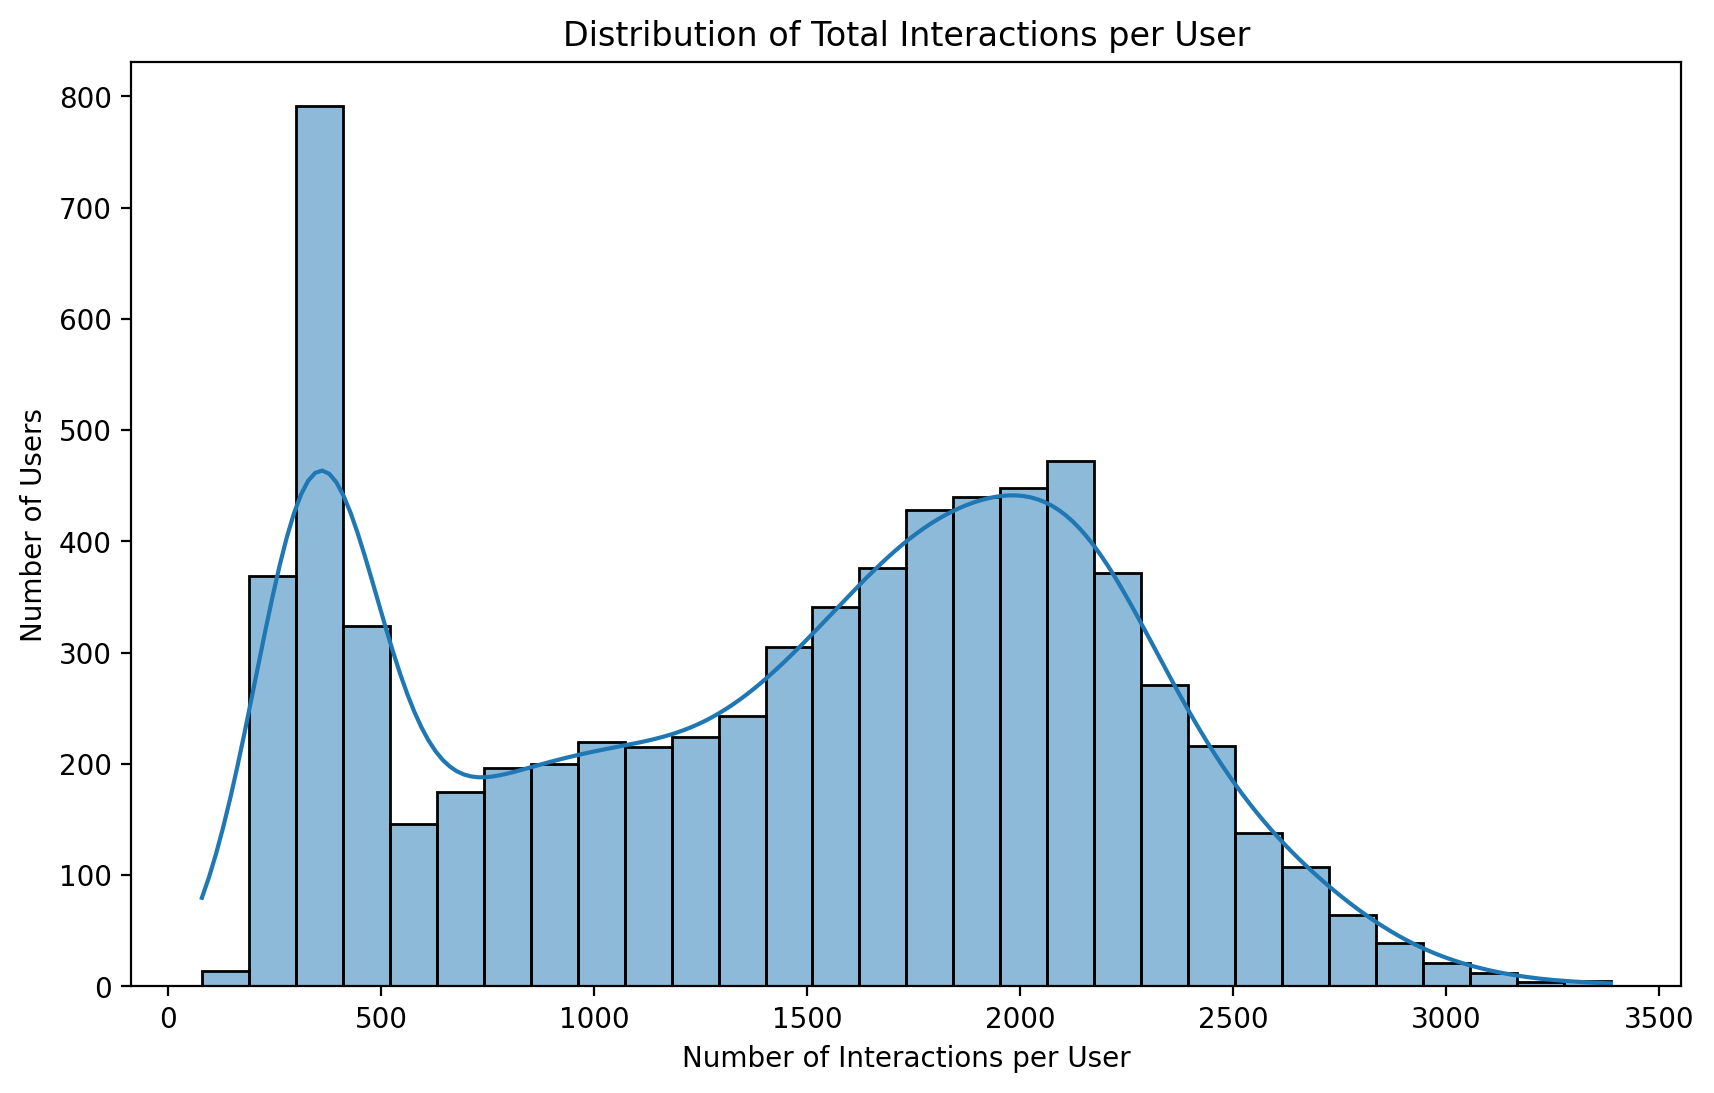

In [17]:
# Interactions per user with unique videos
nb_interactions_per_user = interactions_train.groupby('user_id')['video_id'] \
    .count() \
    .reset_index(name='total_interactions')
print(f"> 6000 interactions: {nb_interactions_per_user[nb_interactions_per_user['total_interactions'] > 6000]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")
print(f"< 3000 interactions: {nb_interactions_per_user[nb_interactions_per_user['total_interactions'] < 3000]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")
print(f"< 200 interactions: {nb_interactions_per_user[nb_interactions_per_user['total_interactions'] < 200]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")
print(f"[200,3000] interactions: {nb_interactions_per_user[(nb_interactions_per_user['total_interactions'] > 200) & (nb_interactions_per_user['total_interactions'] < 3000)]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")

plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_user['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Interactions per User')
plt.show()

We can see two peaks around 300-500

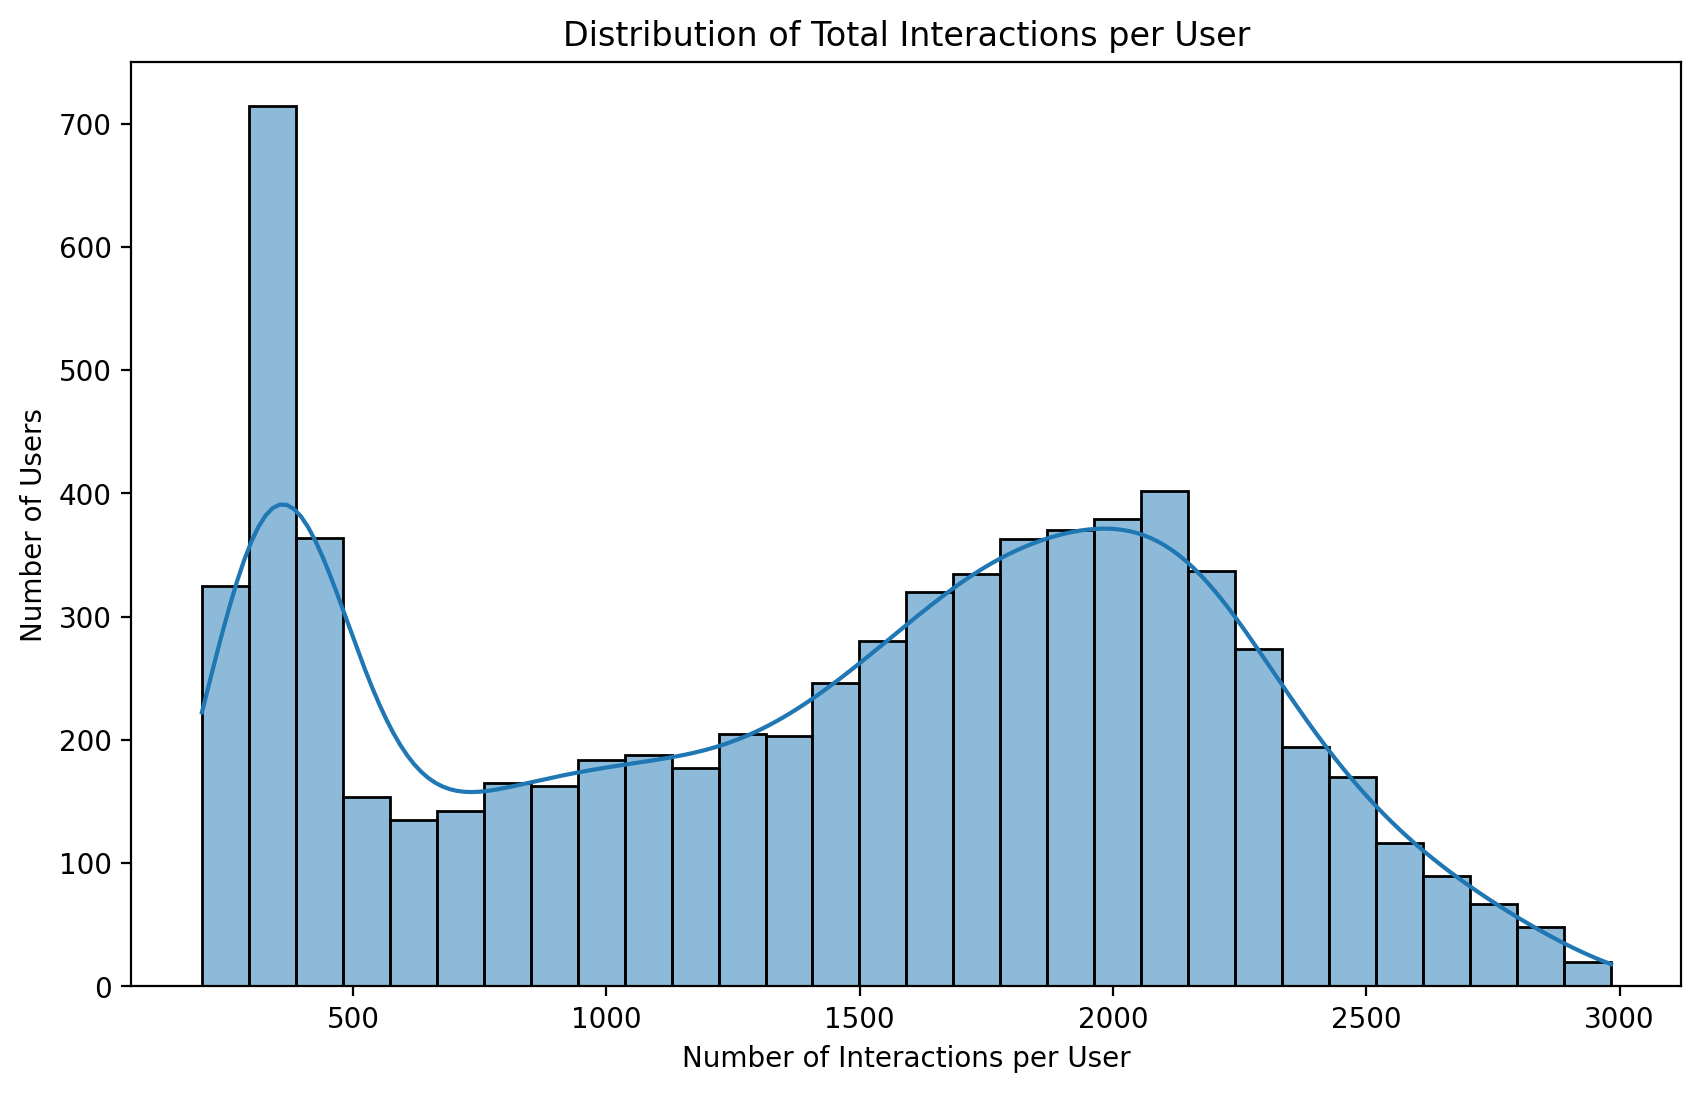

In [18]:
# Interactions in 200 - 3000
nb_interactions_per_user = interactions_train.groupby('user_id')['video_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_user[(nb_interactions_per_user['total_interactions'] > 200) & (nb_interactions_per_user['total_interactions'] < 3000)]['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Interactions per User')

plt.show()

#### Watch Ratio

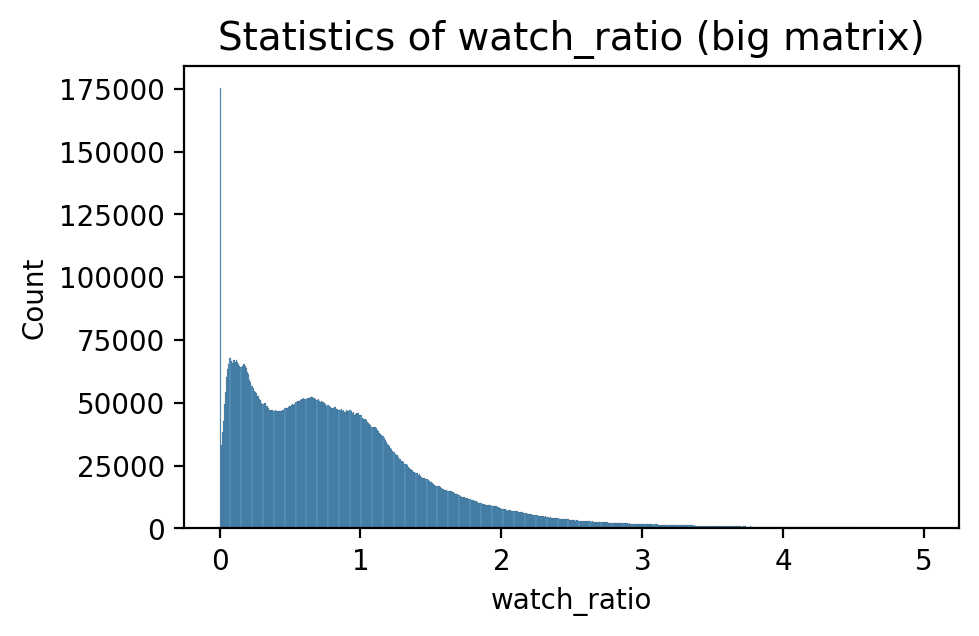

In [19]:
plot_hist_feature("big matrix", interactions_train.watch_ratio[interactions_train.watch_ratio <= 5])

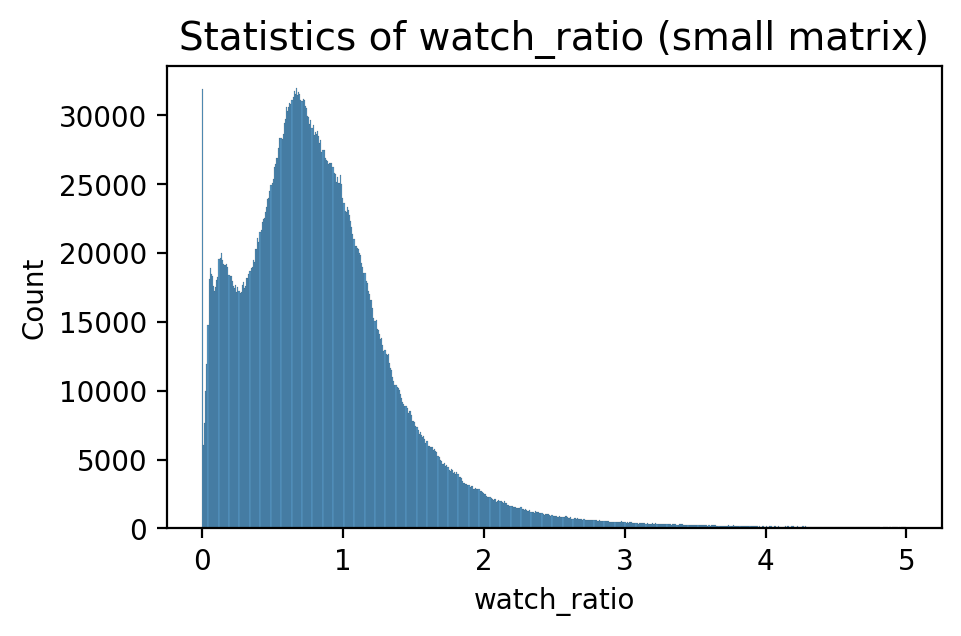

In [23]:
plot_hist_feature("small matrix", interactions_test.watch_ratio[interactions_test.watch_ratio <= 5])

#### Video Duration

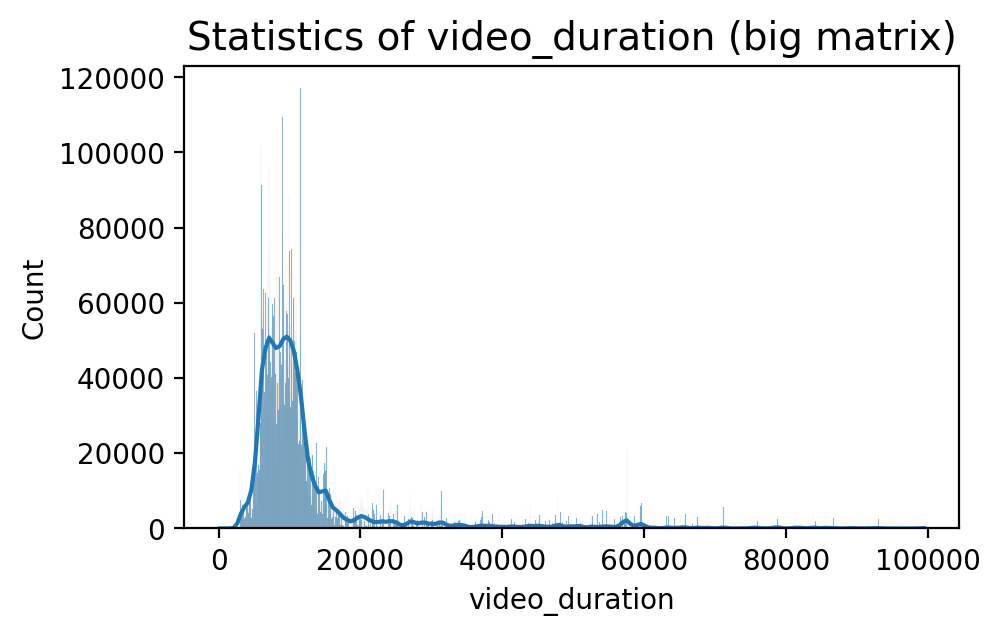

In [25]:
plot_hist_feature("big matrix", interactions_train.video_duration[interactions_train.loc[:, "video_duration"] < 100000], kde=True)

In [ ]:
plot_hist_feature("small matrix", interactions_test.video_duration[interactions_test.loc[:, "video_duration"] < 100000], kde=True)

#### Video interactions

They all have interaction. 

Around 10% of the dataset have less than 10 interactions. Some video (3%) have a lot of interactions, more than 5000.

Some skyrockets with 10000 interactions (4 videos)

* More than 5000 interactions: 2.96%
* Less than 5000 interactions: 97.03%
* Less than **50 interactions: 28.51%**
* Less than **10 interactions: 11.14%**

In [ ]:
# Interactions per video
nb_interactions_per_video = interactions_train.groupby('video_id')['user_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
print(f"> 10000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] > 10000]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"> 5000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] > 5000]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"< 5000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] < 5000]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"< 50 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] < 50]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"< 10 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] < 10]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"0 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] == 0]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"[50,5000] interactions: {nb_interactions_per_video[(nb_interactions_per_video['total_interactions'] > 50) & (nb_interactions_per_video['total_interactions'] < 5000)]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"NB videos with more than 10000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] > 10000]['total_interactions'].count()}")

sns.histplot(nb_interactions_per_video['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per Video')
plt.ylabel('Number of Videos')
plt.title('Distribution of Total Interactions per Video')

plt.show()

In [ ]:
# Interactions per video
nb_interactions_per_video = interactions_train.drop_duplicates(subset=['user_id', 'video_id']).groupby('video_id')['user_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_video['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per Video (unique)')
plt.ylabel('Number of Videos')
plt.title('Distribution of Total Interactions per Video')

plt.show()